In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
from keras.layers import Dense, Flatten
from keras.models import Model

In [ ]:
from IPython.display import Image
import os
import datetime

In [ ]:
data = "/content/drive/MyDrive/tuber/archive (6)/TB_Chest_Radiography_Database"

In [ ]:
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (180, 180),
    batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (180, 180),
    batch_size = batch_size)

Found 4200 files belonging to 2 classes.
Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


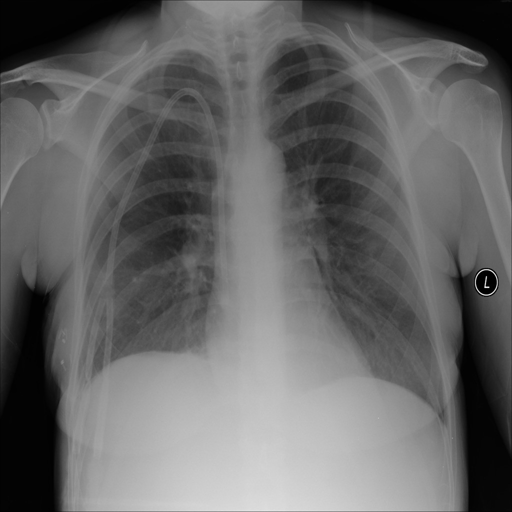

In [ ]:
Image("/content/drive/MyDrive/tuber/archive (6)/TB_Chest_Radiography_Database/Normal/Normal-1.png", height = 300)

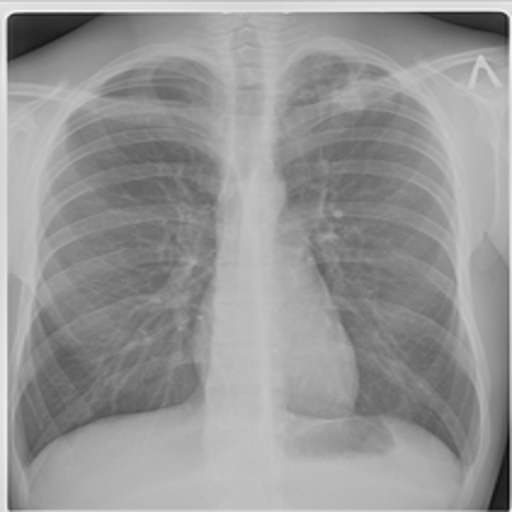

In [ ]:
Image("/content/drive/MyDrive/tuber/archive (6)/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-101.png", height = 300)

In [ ]:
def create_model():
    model = keras.applications.vgg19.VGG19(input_shape = (180, 180, 3), include_top = False)

    for layer in model.layers:
        layer.trainable = False


    X = Flatten()(model.output)
    X = Dense(units = 28, activation = "softmax")(X)
    model = Model(model.input, X)

    model.compile(optimizer = "adam", loss = keras.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])



    return model

In [ ]:
model = create_model()
model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/tuber/archive (6)/best_model.h5")

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model():
    model = create_model()

    tensorboard = create_tensorboard_callback()

    model.fit(train_ds, steps_per_epoch = len(train_ds), epochs = 15, verbose = 1, callbacks = [early_stopping, model_checkpoint], validation_data = val_ds, validation_steps = len(val_ds))
    

    return model

In [ ]:
model = train_model()

Epoch 1/15
105/105 [==============================] - 1108s 10s/step - loss: 1.3877 - accuracy: 0.9482 - val_loss: 0.1664 - val_accuracy: 0.9821
Epoch 2/15
105/105 [==============================] - 39s 354ms/step - loss: 0.0581 - accuracy: 0.9905 - val_loss: 0.2181 - val_accuracy: 0.9774
Epoch 3/15
105/105 [==============================] - 35s 316ms/step - loss: 0.0244 - accuracy: 0.9973 - val_loss: 0.1373 - val_accuracy: 0.9893
Epoch 4/15
105/105 [==============================] - 37s 321ms/step - loss: 0.0172 - accuracy: 0.9970 - val_loss: 0.1097 - val_accuracy: 0.9917
Epoch 5/15
105/105 [==============================] - 37s 319ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0538 - val_accuracy: 0.9940
Epoch 6/15
105/105 [==============================] - 36s 326ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.2308 - val_accuracy: 0.9833
Epoch 7/15
105/105 [==============================] - 34s 313ms/step - loss: 0.0201 - accuracy: 0.9964 - val_loss: 0.1047 - val_ac

In [ ]:
from keras.models import load_model

loaded_model = load_model("/content/drive/MyDrive/tuber/archive (6)/best_model.h5")

In [ ]:
accuracy = model.evaluate(val_ds)[1]

print(f"The accuracy of model is {accuracy * 100:.2f}%")

27/27 [==============================] - 8s 177ms/step - loss: 0.1587 - accuracy: 0.9893
The accuracy of model is 98.93%


In [ ]:
labels = train_ds.class_names
labels

['Normal', 'Tuberculosis']

In [ ]:
def result(file_path):
    image = tf.keras.preprocessing.image.load_img(file_path, target_size = (180, 180))
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    input = tf.keras.applications.resnet50.preprocess_input(img_array)
    img = np.expand_dims(input, axis = 0)
    preds = np.argmax(model.predict(img))

    print(f"Patient Status: {labels[preds]}")

    if labels[preds] == "Tuberculosis":
        print("Patient has been diagnosed with Tuberculosis")

    else:
        print("Patient has not been diagnosed with Tuberculosis")

In [ ]:
path = "/content/drive/MyDrive/tuber/archive (6)/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png"

result(path)

1/1 [==============================] - 1s 720ms/step
Patient Status: Tuberculosis
Patient has been diagnosed with Tuberculosis


In [ ]:
path = "/content/drive/MyDrive/tuber/archive (6)/TB_Chest_Radiography_Database/Normal/Normal-1003.png"

result(path)

1/1 [==============================] - 0s 23ms/step
Patient Status: Normal
Patient has not been diagnosed with Tuberculosis
